# Predicting customer churn for SyriaTel

#### Project description: **SyriaTel Customer Churn**

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

#### A predictive finding might include:

How well your model is able to predict the target
What features are most important to your model
A predictive recommendation might include:

The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
Suggestions for how the business might modify certain input variables to achieve certain target results

#### Iterative Approach to Modeling
You should demonstrate an iterative approach to modeling. This means that you must build multiple models. Begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs in the notebook discussing your final model.

With the additional techniques you have learned in Phase 3, be sure to explore:

Model features and preprocessing approaches
Different kinds of models (logistic regression, decision trees, etc.)
Different model hyperparameters
At minimum you must build two models:

A simple, interpretable baseline model (logistic regression or single decision tree)
A version of the simple model with tuned hyperparameters

#### Classification Metrics
You must choose appropriate classification metrics and use them to evaluate your models. Choosing the right classification metrics is a key data science skill, and should be informed by data exploration and the business problem itself. You must then use this metric to evaluate your model performance using both training and testing data.

**Potential Business Questions:**

* What were the factors influencing customer churn?
* What is the best model for predicting customer churn?
* How can the insights from feature importance help improve customer churn?
* Which services have the highest impact on customer churn?
* What services do customers with longer tenure have?
* What types of customers buy into long term contracts?
* What percentage of customers leave after one month/6 months/1 year
* Which state has the highest churn rate?

Plan:
* identify the key features that determine if a customer is likely to churn
* determine the most suitable model to predict Customer Churn 
* create customer retention strategy to reduce churn

### Data understanding

In [449]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder

In [450]:
df = pd.read_csv('churn_data.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [451]:
df.shape

(3333, 21)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [453]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [454]:
df.duplicated().sum()

0

In [455]:
df['phone number'].duplicated().value_counts()

False    3333
Name: phone number, dtype: int64

In [456]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Data dictionary 

* state: State where the customer resides
* account length: Duration (in days) the account has been active
* area code: Customer's area code
* phone number: Customer's phone number
* international plan: Indicates if the customer subscribes to the international plan
* voice mail plan: Indicates if the customer subscribes to the voice mail plan
* number vmail messages: Number of voicemails sent by the customer
* total day minutes: Total minutes of calls made during the day
* total day calls: Total number of daytime calls made
* total day charge: Charges for daytime calls
* total eve minutes: Total minutes of calls made during the evening
* total eve calls: Total number of evening calls made
* total eve charge: Charges for evening calls
* total night minutes: Total minutes of calls made at night
* total night calls: Total number of nighttime calls made
* total night charge: Charges for nighttime calls
* total intl minutes: Total minutes of international calls made
* total intl calls: Total number of international calls made
* total intl charge: Charges for international calls
* customer service calls: Number of customer service calls made
* churn: Indicates if the customer has terminated their contract

We have a datagrame with 3333 rows, 21 columns, with no missing values and no dupilcates.

### Data cleaning

The data set is originally very clean, we just need to make a couple if adjustments:  
* We replace spaces with a underline in the column name for a convinient format and to avoid mistakes.  
* We drop phone number column, as it doesn't bring any value for future analysis, it's a unique value for each row and we already used it to check for duplicates.  
* We replace values in three columns to 1s and 0s for further steps.

In [457]:
#renaming columns
df.columns = df.columns.str.replace(' ', '_')

In [458]:
#replacing objects and bool to numbers

df['international_plan'] = df['international_plan'].replace({'yes': 1, 'no': 0})

df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': 1, 'no': 0})

df['churn'] = df['churn'].replace({True: 1, False: 0})

In [459]:
#drop unnecessary column
df = df.drop('phone_number', axis=1)

Let's take a look at a final clean columns -  3333 rows and 20 columns. Edited column names and replaces values in three columns

In [475]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### EDA

Let's plot and take a look at distribution of all numerical columns. 

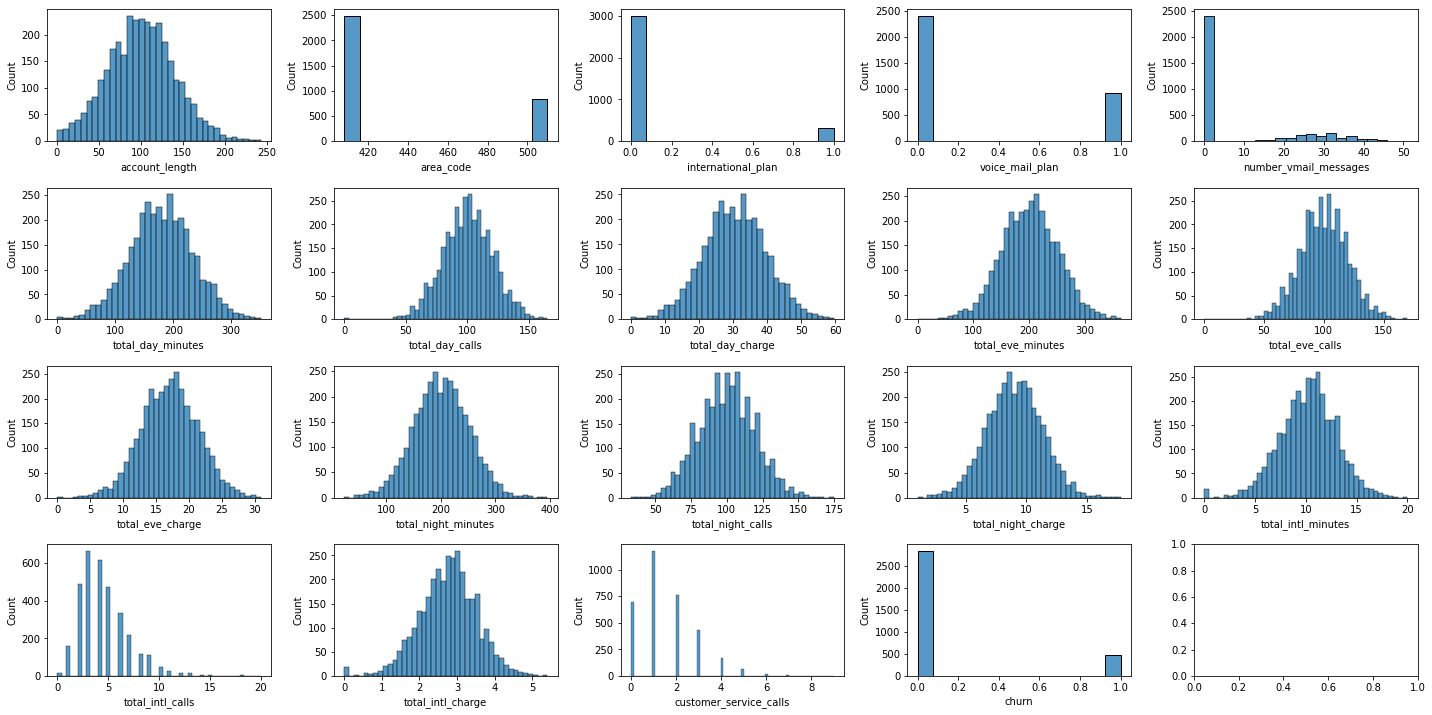

In [461]:
numeric = df.select_dtypes(include=['float64','int64'])

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, feature in enumerate(numeric):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Target variable

Target variable is churn. It is a binary variable.

The dataset is imbalanced. Around 85% of target variable has a value of 0, and around 15% value of 1.

A dataset is considered imbalanced for regression tasks when the distribution of the target variable is skewed or has outliers that can disproportionately influence the model's performance. It can make the model biased towards more frequent values.

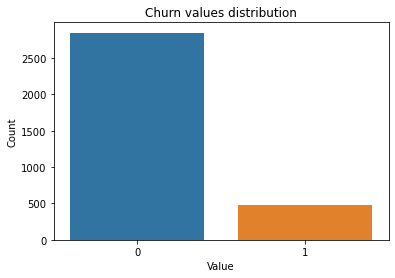

In [462]:
sns.countplot(x='churn', data=df)
plt.title('Churn values distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [463]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Feature analysis

In [464]:
# Create numeric and categorical lists

categorical = ['state','area_code','international_plan','voice_mail_plan', 'phone_number']

numerical = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
                'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']

We have three different area codes. 50% of clients are in area 415, 25% in area 510, 25% in area 408.

In [465]:
df['area_code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: area_code, dtype: float64

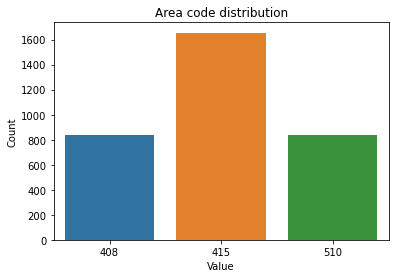

In [466]:
sns.countplot(x='area_code', data=df)
plt.title('Area code distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

90% of clients dont have an international plan

In [467]:
df['international_plan'].value_counts(normalize=True)

0    0.90309
1    0.09691
Name: international_plan, dtype: float64

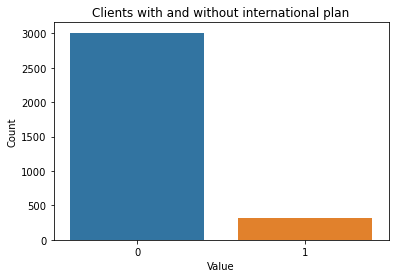

In [480]:
sns.countplot(x='international_plan', data=df)
plt.title('Clients with and without international plan')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

27% of clients have voice mail plan and 72% dont have a voice mail plan

In [468]:
df['voice_mail_plan'].value_counts(normalize=True)

0    0.723372
1    0.276628
Name: voice_mail_plan, dtype: float64

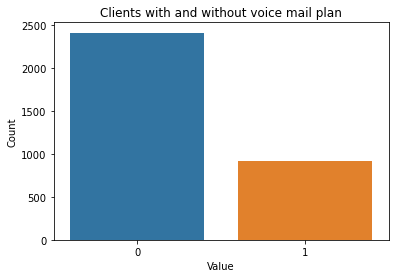

In [481]:
sns.countplot(x='voice_mail_plan', data=df)
plt.title('Clients with and without voice mail plan')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Let's take a look at how clients are dictributed geographically among states.
Least amount of clients are located in California, most amount of clients are in West Virginia.

In [469]:
df['state'].value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
WI    0.023402
OH    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
MT    0.020402
NC    0.020402
NV    0.019802
WA    0.019802
CO    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ND    0.018602
ME    0.018602
OK    0.018302
NE    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

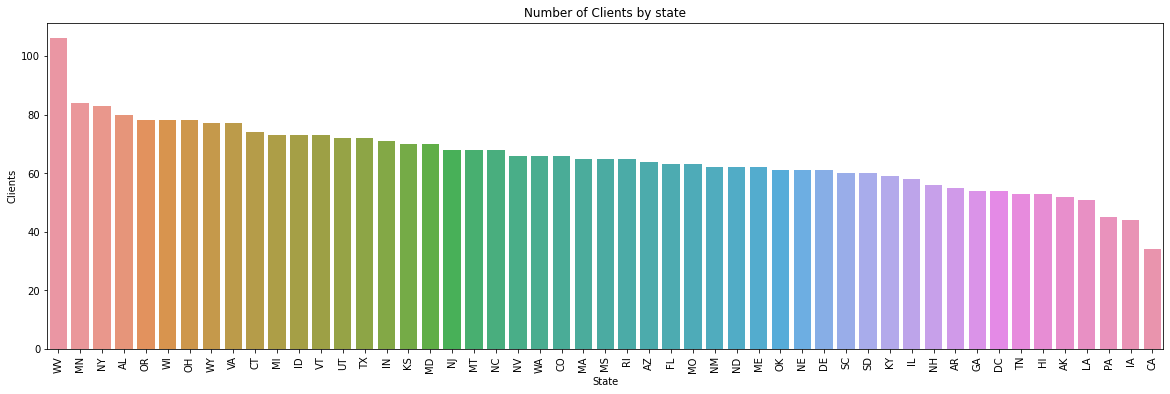

In [486]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='state', data=df, order=df['state'].value_counts().index)

plt.title('Number of Clients by state')
plt.xlabel('State')
plt.ylabel('Clients')

plt.xticks(rotation=90)
plt.show()

### Multicollinearity

In order to detect multicollinearity we make a matrix of Pearson correlation coefficients among the predictor variables. High correlation coefficients (e.g., above 0.75) suggest multicollinearity.

We need to avoid multicollinearity because it can lead to unreliable and unstable estimates of regression coefficients, making it difficult to determine the effect of each independent variable on the dependent variable. This can also result in inflated standard errors, leading to a higher chance of failing to identify significant variables.


In [470]:
#
df.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [471]:
abs(df.corr()) > 0.75

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area_code,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
international_plan,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
voice_mail_plan,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_vmail_messages,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total_day_minutes,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total_day_calls,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
total_day_charge,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total_eve_minutes,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
total_eve_calls,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


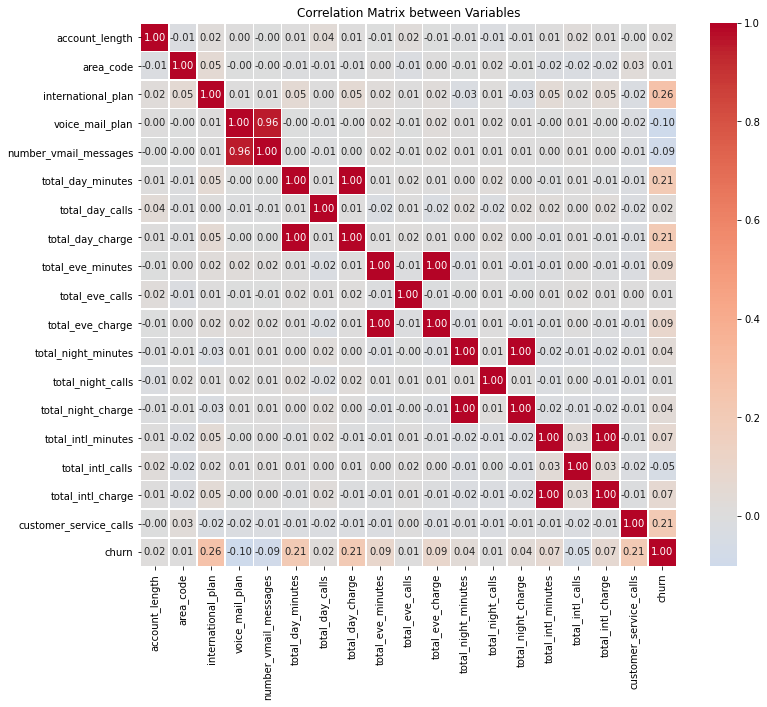

In [472]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

### One hot encoding for area code and state

Baseline area code is 408. Baseline state is AK - alaska

In [473]:
# OHE for area code
df_area = df[['area_code']].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(df_area)
ohe.transform(df_area)
df_area_ohe = pd.DataFrame(
    data=ohe.transform(df_area),
    columns=[f"area_{cat}" for cat in ohe.categories_[0][1:]]
)
df_area_ohe
df = pd.concat([df, df_area_ohe], axis=1)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_415,area_510
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,1.0,0.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,1.0,0.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,1.0,0.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,0.0,0.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,0,1.0,0.0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,0,1.0,0.0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,0,0.0,1.0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,0,0.0,1.0


In [474]:
# OHE for area code
df_state = df[['state']].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(df_state)
ohe.transform(df_state)
df_state_ohe = pd.DataFrame(
    data=ohe.transform(df_state),
    columns=[f"state_{cat}" for cat in ohe.categories_[0][1:]]
)
df_state_ohe
df = pd.concat([df, df_state_ohe], axis=1)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standardize? Standard scaler

## Models:

* Logistic regression
* Decision tree
* Random Forest